Vy = 0:
t >               |     xx >        |     yy >         |   vy >
0.436 15.248969975530127 1.0000232963587727 0.005655473108983166

Xy = 0:
t > |    xx >          |     yy >           |   vy >
0.901 28.79394580127005 0.0032109311304750563 -4.190903448453577



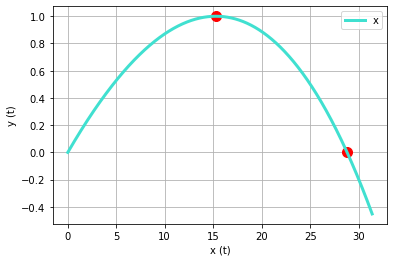

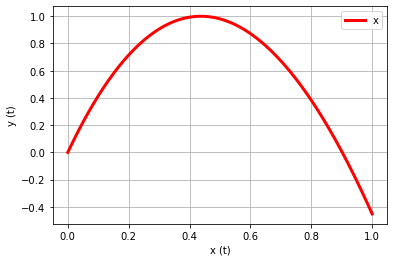

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Gravidade
g = 9.8

# Tempo inicial e final
ti = 0
tf = 1

# Velocidade terminal (paraquedas fechado)
vtx = 100 * 1000 / 3600
vty = 100 * 1000 / 3600

# Angulo inicial
alpha = 7

# Posição inicial
xx0 = 0
xy0 = 0


# Velocidade inicial
v0 = 140 * 1000 / 3600

vx0 = v0 * np.cos(np.deg2rad(alpha))
vy0 = v0 * np.sin(np.deg2rad(alpha))


# Calcular D para a resistencia do ar
Dx = g / (vtx * np.abs(vtx))
Dy = g / (vty * np.abs(vty))


# dt incremento do tempo e n numero de intervalos
dt = 0.001
n = int((tf - ti) / dt)

# Vetor tempo (n+1 para garantir que nao falta o ultimo dado (Ex: t[10]))
t = np.linspace(ti, tf, n + 1)

# Vetor velocidade (empty e não zeros para não alterar 
# muito o resultado se faltar analisar um dado)
xx = np.empty(n + 1)
vx = np.empty(n + 1)
ax = np.empty(n + 1)

xy = np.empty(n + 1)
vy = np.empty(n + 1)
ay = np.empty(n + 1)

# Introduzir x0 e v0 nos vetores da posição e velocidade
xx[0] = xx0
vx[0] = vx0

xy[0] = xy0
vy[0] = vy0



# Preencher os vetores x, v, a
for i in range(n):
    vTotal = np.sqrt(vx[i] ** 2 + vy[i] ** 2)
        
    ax[i] = - Dx * np.abs(vTotal) * vx[i]
    xx[i + 1] = xx[i] + vx[i] * dt
    vx[i + 1] = vx[i] + ax[i] * dt
    
    ay[i] = - Dy * np.abs(vTotal) * vy[i] - g
    xy[i + 1] = xy[i] + vy[i] * dt
    vy[i + 1] = vy[i] + ay[i] * dt
    

        
# Encontrar os dados do paraquedista quando ele chega ao solo (x = 0)
for i in range(n):
    if (vy[i] > (0 - dt) and vy[i + 1] < (0 + dt)):
        print("Vy = 0:")
        print("t >               |     xx >        |     yy >         |   vy >")
        print(t[i], xx[i], xy[i], vy[i])
        print("")
        plt.plot(xx[i], xy[i], "o", markersize="10", linewidth=5, color="red")
        break

# Encontrar os dados do paraquedista quando ele chega ao solo (x = 0)
for i in range(n):
    if (xy[i] > (0 - dt) and xy[i + 1] < (0 + dt)):
        print("Xy = 0:")
        print("t > |    xx >          |     yy >           |   vy >")
        print(t[i], xx[i], xy[i], vy[i])
        print("")
        plt.plot(xx[i], xy[i], "o", markersize="10", linewidth=5, color="red")
        break



# Plot
plt.plot(xx, xy, label="x",  linestyle='-', linewidth=3, color="turquoise")
plt.xlabel("x (t)")
plt.ylabel("y (t)")
plt.legend()         # Legenda só aparece com isto
plt.grid()
plt.show()

# Plot
plt.plot(t, xy, label="x",  linestyle='-', linewidth=3, color="red")
plt.xlabel("x (t)")
plt.ylabel("y (t)")
plt.legend()         # Legenda só aparece com isto
plt.grid()

